**Name: Escalicas Peter Allen**

**Section: BSCPE32S3**

**Date Of Submission: March 26, 2024**

**Activity: Assignment 5.2 Multilayer Perceptron **

# Explain the problem you are trying to solve:

The problem that I am trying to solve with my dataset is that to determine whether a patient survived or is deceased at a time of about 9 days after collecting their medical record at the hospital.


# Importing Libraries

In [117]:
#importing the libraries and checking if there are null values
#https://archive.ics.uci.edu/dataset/827/sepsis+survival+minimal+clinical+records link for my dataset
import pandas as pd
import seaborn as sns
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Loading of Dataset

In [118]:
#loading of Dataset and checking of data types.
sepsis = pd.read_csv('/content/sepsis2.csv')
print(sepsis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19051 entries, 0 to 19050
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age_years                      19051 non-null  int64
 1   sex_0male_1female              19051 non-null  int64
 2   episode_number                 19051 non-null  int64
 3   hospital_outcome_1alive_0dead  19051 non-null  int64
dtypes: int64(4)
memory usage: 595.5 KB
None


Observation:

I checked first the dataset if there are null values, As we can see by the print above there are no null values in my dataset.

In [119]:
#finding of Null Values
sepsis.isnull().sum()

age_years                        0
sex_0male_1female                0
episode_number                   0
hospital_outcome_1alive_0dead    0
dtype: int64

Observation:

To be extra sure, I did a double checking on null values and thankfully there aren't null values in my dataset.

In [120]:
#Cheking if the Dataset is loading
sepsis.head()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,7,1,1,1
1,17,0,2,1
2,70,0,1,1
3,76,0,1,1
4,8,0,1,1


Observation:

As we can observe, the dataset is loading and working perfectly fine as I run the .head which outputs the first 5 entries.

In [94]:
#Describing the Dataset
sepsis.describe()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
count,19051.000000,19051.000000,19051.000000,19051.000000
mean,72.503228,0.448585,1.396252,0.810719
std,18.614470,0.497363,0.783749,0.391742
min,0.000000,0.000000,1.000000,0.000000
25%,65.000000,0.000000,1.000000,1.000000
50%,77.000000,0.000000,1.000000,1.000000
75%,85.000000,1.000000,2.000000,1.000000
max,100.000000,1.000000,5.000000,1.000000


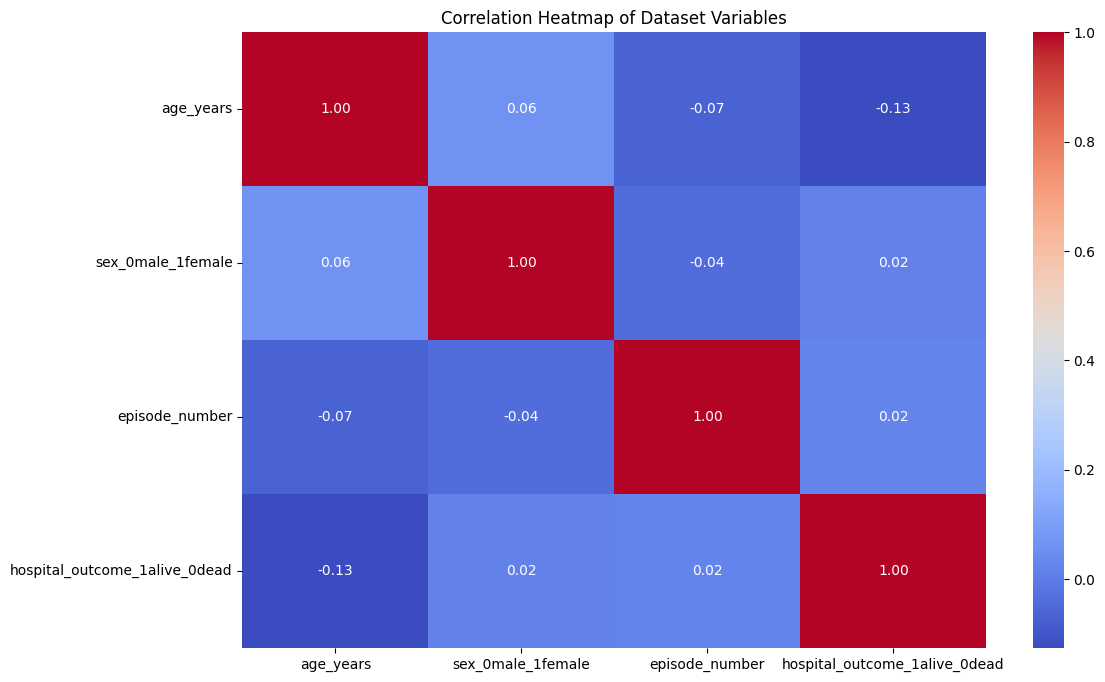

In [95]:
# Calculate the correlation matrix
correlation_matrix = sepsis.corr()

# Plot the correlation matrix using Seaborn's heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Dataset Variables')
plt.show()

Observation:

As shown in this heatmap, it is confirmed that the variables in this data set is non-linear since all of them has the values that are far from 1.

# Feature selection

In [121]:
# Feature Selection
X = sepsis.drop(columns=['hospital_outcome_1alive_0dead'])
y = sepsis['hospital_outcome_1alive_0dead']

# Data Splitting

In [122]:
# Splitting the data into training and testing sets 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting the data into testing and validation sets 50% and 50%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

X_train.shape

(7620, 3)

Observation:

In this part of the Activity I have done the Data splitting, the X_train & X_test, and also the y_train & y_test. In this code we can see the test_size that I used is 0.2, it means I splitted the training data to 80% and testing data to 20% hence that is why it is configured to 0.2.

In [98]:
#checking the values of our split data
print(X_train.shape)

print(X_test.shape)

print(y_train.shape)

print(y_test.shape)

(7620, 3)
(3811, 3)
(7620,)
(3811,)


In [131]:
# Scaling the Features
scaler = MinMaxScaler()                                                                 #minmax scaler = use to transform the features
X_train_scaled = scaler.fit_transform(X_train)                                          #fits the scaler to the X_train then transforms it
X_test_scaled = scaler.transform(X_test)                                                #transforms the test data (X_test) using the mean and standard deviation calculated from the training data.
X_val_scaled = scaler.transform(X_val)

In [133]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 3, input_dim = 3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')                                              #Sigmoid = it is used on the last layer to make the output 0's and 1's
])



In [134]:
# Compiling the model
model.compile(
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001),   #without this the firts initial accuracy will be 0.81% and it will remain as is. In this way we can see how the model learns as it progresses.
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [135]:
#training the model
model.fit(X_train_scaled, y_train, epochs=60, batch_size=32)                                                 #result of the training model

Epoch 1/60
239/239 [==============================] - 2s 2ms/step - loss: 0.6988 - accuracy: 0.6051
Epoch 2/60
239/239 [==============================] - 1s 2ms/step - loss: 0.6972 - accuracy: 0.6230
Epoch 3/60
239/239 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.6294
Epoch 4/60
239/239 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.6297
Epoch 5/60
239/239 [==============================] - 1s 2ms/step - loss: 0.6894 - accuracy: 0.6479
Epoch 6/60
239/239 [==============================] - 1s 2ms/step - loss: 0.6861 - accuracy: 0.6741
Epoch 7/60
239/239 [==============================] - 1s 3ms/step - loss: 0.6836 - accuracy: 0.7039
Epoch 8/60
239/239 [==============================] - 1s 3ms/step - loss: 0.6816 - accuracy: 0.7180
Epoch 9/60
239/239 [==============================] - 1s 4ms/step - loss: 0.6779 - accuracy: 0.7257
Epoch 10/60
239/239 [==============================] - 1s 2ms/step - loss: 0.6763 - accuracy: 0.7332

Observation:

After training my model, we can see that after the 60th epoch it has reached the optimal accuracy for this dataset.  The accuracy is 0.8115 or 81% which is a pretty good accuracy for this model.

In [136]:
#Evaluating
model.fit(X_val_scaled, y_val, epochs=60, batch_size=32)

Epoch 1/60
239/239 [==============================] - 1s 2ms/step - loss: 0.5873 - accuracy: 0.8054
Epoch 2/60
239/239 [==============================] - 1s 3ms/step - loss: 0.5823 - accuracy: 0.8055
Epoch 3/60
239/239 [==============================] - 1s 3ms/step - loss: 0.5856 - accuracy: 0.8055
Epoch 4/60
239/239 [==============================] - 1s 2ms/step - loss: 0.5855 - accuracy: 0.8055
Epoch 5/60
239/239 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.8055
Epoch 6/60
239/239 [==============================] - 1s 3ms/step - loss: 0.5825 - accuracy: 0.8055
Epoch 7/60
239/239 [==============================] - 1s 3ms/step - loss: 0.5839 - accuracy: 0.8055
Epoch 8/60
239/239 [==============================] - 1s 3ms/step - loss: 0.5808 - accuracy: 0.8055
Epoch 9/60
239/239 [==============================] - 1s 3ms/step - loss: 0.5791 - accuracy: 0.8055
Epoch 10/60
239/239 [==============================] - 1s 2ms/step - loss: 0.5818 - accuracy: 0.8055

Observation:

As we can see in my evaluation for my model it has an accuracy of 0.8055 or 80%
a loss of 0.5573 in the Testing data.

# Summary

For this Assignment I had a hardtime at finding the Appropriate dataset for this assignment, because most of the Dataset that I'm finding it is either the file is not supported or it is a Linear dataset. Since for neural networks it is best used for Non linear datasets so that we can utilize the neural networks.
First and foremost now that I found a dataset, firstly we need to check first if the datasets if there are null values or what type of data are there in your dataset. In my case my dataset are all integer and there are no null-values in my dataset. After that I quickly did a heatmap to know if my dataset are non linear, you can observe this if your heatmap values are far from 1, which in my case all of my values are very far from the value 1. Now to initialize the modeling I need to drop the column of my target variable in my dataset, after that I need to declare it as my Target variable as shown in my 3rd code cell. After that I now need to do the spliting of data, the x and y train, x and y test for my data split, I divided the training of data to 80/20 hence that is why my test_size is 0.2. After that I presented the Mean and std of the X_train variable in order for it to fit in the Scalar section of the code, it is important to do it since the variables mighe result into a leakage or worse may lead to overfitting. Furthermore after the training of the model, I now did the model.fit in order to know the accuracy of my model for the training data and the result is 0.8115 which is also 81%. Lastly I need to evaluate or verify my model if it has near accuracy percentage to the actual accuracy of the Data which is the Test datas. And true enough the accuracy for that model is 0.8055 or 80%.